In [121]:
%%time
import os
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from datetime import timedelta

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

CPU times: user 270 µs, sys: 13 µs, total: 283 µs
Wall time: 273 µs


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/geometrein/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/geometrein/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/geometrein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
%%time
year = 2022
path = os.path.join('data', f'news_headlines_en_{year}.csv')
source_df = pd.read_csv(path, sep='\t')
source_df.sample(10)

CPU times: user 9.53 ms, sys: 2.18 ms, total: 11.7 ms
Wall time: 9.95 ms


,date,headline,link
2431,2022-07-26 13:58:05,Electricity almost free in windy Finland; petr...,https://yle.fi/news/3-12550928
789,2022-03-03 17:09:15,"6,029 New Coronavirus Infections in Finland.",https://finlandtoday.fi/6029-new-coronavirus-i...
2798,2022-09-14 14:14:18,Court blocks all ICU nurses' strikes planned f...,https://yle.fi/news/3-12623060
2436,2022-07-27 06:03:05,Finnish universities feature in global ranking...,https://www.goodnewsfinland.com/finnish-univer...
1438,2022-04-22 13:10:30,Report: Finland records highest mortality rate...,https://yle.fi/news/3-12414016
3075,2022-10-19 12:41:08,Veteran politician Väyrynen withdraws from par...,https://yle.fi/news/3-12662550
2802,2022-09-15 06:04:18,Finnish entities announce sustainability-relat...,https://www.goodnewsfinland.com/news-spotlight...
1892,2022-05-30 09:23:24,Finnish Lapland benefited from internal migrat...,https://www.helsinkitimes.fi/finland/finland-n...
3208,2022-11-04 13:46:08,Gunshot wound claims conscript's life.,https://yle.fi/news/3-12672904
3243,2022-11-10 16:11:08,Sámi parliament law delayed again as Centre ta...,https://yle.fi/a/3-12675492


In [123]:
%%time
def pre_process_data(df: pd.DataFrame) -> pd.DataFrame:
    df['date'] = pd.to_datetime(df['date'])
    # Convert to lowercase
    df['headline'] = df['headline'].str.lower()
    # Tokenize
    df['headline_token'] = df['headline'].apply(word_tokenize)
    # Load and remove stopwords
    stopwords = nltk.corpus.stopwords.words("english")
    df['headline_token'] = df['headline_token'].apply(lambda x: [item for item in x if item not in stopwords])
    # Remove punctuation
    df['headline_token'] = df['headline_token'].apply(lambda x: [item for item in x if item.isalpha()])
    return df

clean_df = pre_process_data(source_df)
clean_df

CPU times: user 319 ms, sys: 5.05 ms, total: 324 ms
Wall time: 328 ms


,date,headline,link,headline_token
0,2022-01-01 11:40:30,omicron now dominant covid strain in helsinki.,https://yle.fi/news/3-12254985,"[omicron, dominant, covid, strain, helsinki]"
1,2022-01-01 12:50:11,marin on nato: finland should keep options open.,https://yle.fi/news/3-12255035,"[marin, nato, finland, keep, options, open]"
2,2022-01-01 14:40:16,"russia-us tensions also impact finland, presid...",https://yle.fi/news/3-12255130,"[tensions, also, impact, finland, president, s..."
3,2022-01-01 16:40:36,finland sees leap in births.,https://yle.fi/news/3-12255208,"[finland, sees, leap, births]"
4,2022-01-02 10:33:46,finland pays €14 million in compensation to ev...,https://yle.fi/news/3-12255542,"[finland, pays, million, compensation, events,..."
...,...,...,...,...
3569,2022-12-30 13:44:29,top gun: maverick finland's most watched film ...,https://yle.fi/a/74-20010885,"[top, gun, maverick, finland, watched, film]"
3570,2022-12-30 15:24:29,report: alcohol abuse a big problem in finland...,https://yle.fi/a/74-20010916,"[report, alcohol, abuse, big, problem, finland..."
3571,2022-12-30 16:44:29,finnish chain hesburger agrees exclusive deal ...,https://yle.fi/a/74-20010925,"[finnish, chain, hesburger, agrees, exclusive,..."
3572,2022-12-30 17:24:29,record number of women volunteer for military ...,https://yle.fi/a/74-20010932,"[record, number, women, volunteer, military, s..."


# Unsupervised Sentiment Analysis with VADER
---

In [125]:
def get_sentiments(df: pd.DataFrame) -> pd.DataFrame:
    sa_model = SentimentIntensityAnalyzer()
    df['polarity'] = df['headline'].apply(lambda x: sa_model.polarity_scores(x))
    final_df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
    return final_df

df = get_sentiments(df=clean_df)
df

,date,headline,link,headline_token,neg,neu,pos,compound
0,2022-01-01 11:40:30,omicron now dominant covid strain in helsinki.,https://yle.fi/news/3-12254985,"[omicron, dominant, covid, strain, helsinki]",0.167,0.833,0.000,-0.0516
1,2022-01-01 12:50:11,marin on nato: finland should keep options open.,https://yle.fi/news/3-12255035,"[marin, nato, finland, keep, options, open]",0.000,1.000,0.000,0.0000
2,2022-01-01 14:40:16,"russia-us tensions also impact finland, presid...",https://yle.fi/news/3-12255130,"[tensions, also, impact, finland, president, s...",0.310,0.690,0.000,-0.4019
3,2022-01-01 16:40:36,finland sees leap in births.,https://yle.fi/news/3-12255208,"[finland, sees, leap, births]",0.000,1.000,0.000,0.0000
4,2022-01-02 10:33:46,finland pays €14 million in compensation to ev...,https://yle.fi/news/3-12255542,"[finland, pays, million, compensation, events,...",0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...
3569,2022-12-30 13:44:29,top gun: maverick finland's most watched film ...,https://yle.fi/a/74-20010885,"[top, gun, maverick, finland, watched, film]",0.214,0.625,0.161,-0.1531
3570,2022-12-30 15:24:29,report: alcohol abuse a big problem in finland...,https://yle.fi/a/74-20010916,"[report, alcohol, abuse, big, problem, finland...",0.408,0.592,0.000,-0.7845
3571,2022-12-30 16:44:29,finnish chain hesburger agrees exclusive deal ...,https://yle.fi/a/74-20010925,"[finnish, chain, hesburger, agrees, exclusive,...",0.000,0.752,0.248,0.3182
3572,2022-12-30 17:24:29,record number of women volunteer for military ...,https://yle.fi/a/74-20010932,"[record, number, women, volunteer, military, s...",0.000,0.874,0.126,0.0772


In [126]:
daily_df = df.groupby([pd.Grouper(key='date', freq='D')])['compound'].sum().reset_index()
weekly_df = df.groupby([pd.Grouper(key='date', freq='W')])['compound'].sum().reset_index()
monthly_df = df.groupby([pd.Grouper(key='date', freq='M')])['compound'].sum().reset_index()

In [127]:
daily_df['simple_moving_avg'] = daily_df['compound'].rolling(7).mean()
weekly_df['simple_moving_avg'] = weekly_df['compound'].rolling(4).mean()

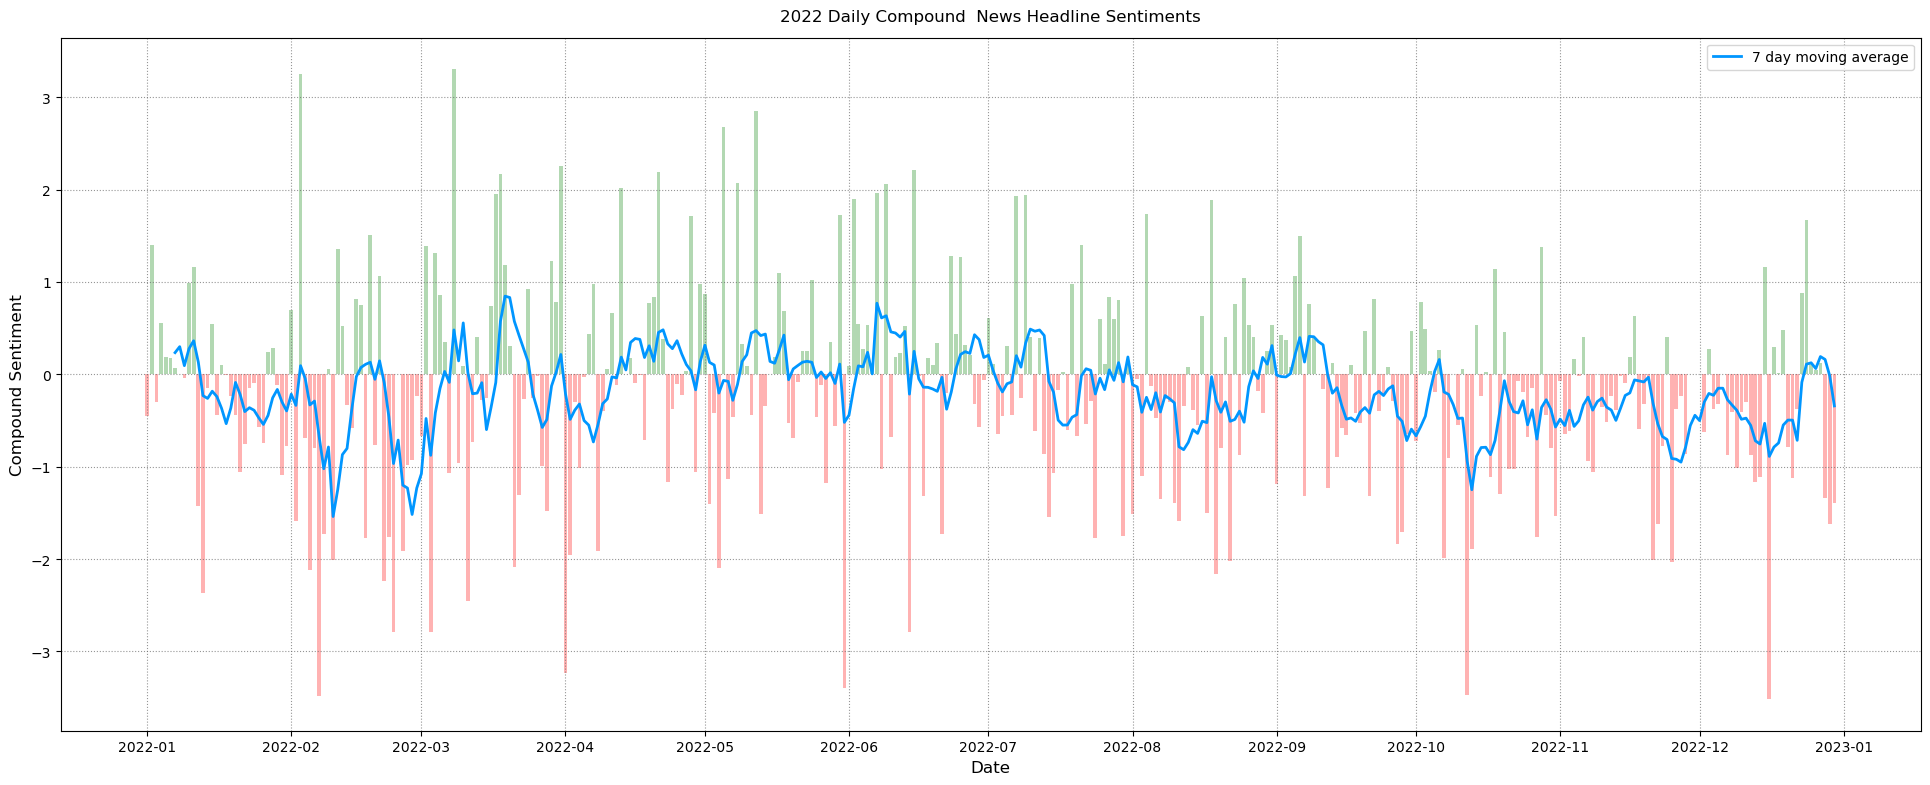

In [128]:
def plot_daily_compound_sentiments(daily_df):
    fig, ax = plt.subplots(figsize=(24, 9), facecolor='w')

    ax.plot(daily_df['date'], daily_df['simple_moving_avg'], color='#0096FF', marker='', linestyle='-',linewidth=2, markersize=12, alpha=1) #2AAA8A
    color = ['r' if y < 0 else 'g' for y in daily_df['compound'].to_list()]
    ax.bar(daily_df['date'], daily_df['compound'], alpha=0.3, color=color)

    ax.set_title( "2022 Daily Compound  News Headline Sentiments", fontsize=12, pad=12)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Compound Sentiment", fontsize=12)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Legend & Grid
    ax.legend(["7 day moving average"])
    ax.grid(linestyle=":", color='#696969', alpha=0.7)

    plt.show()

plot_daily_compound_sentiments(daily_df)

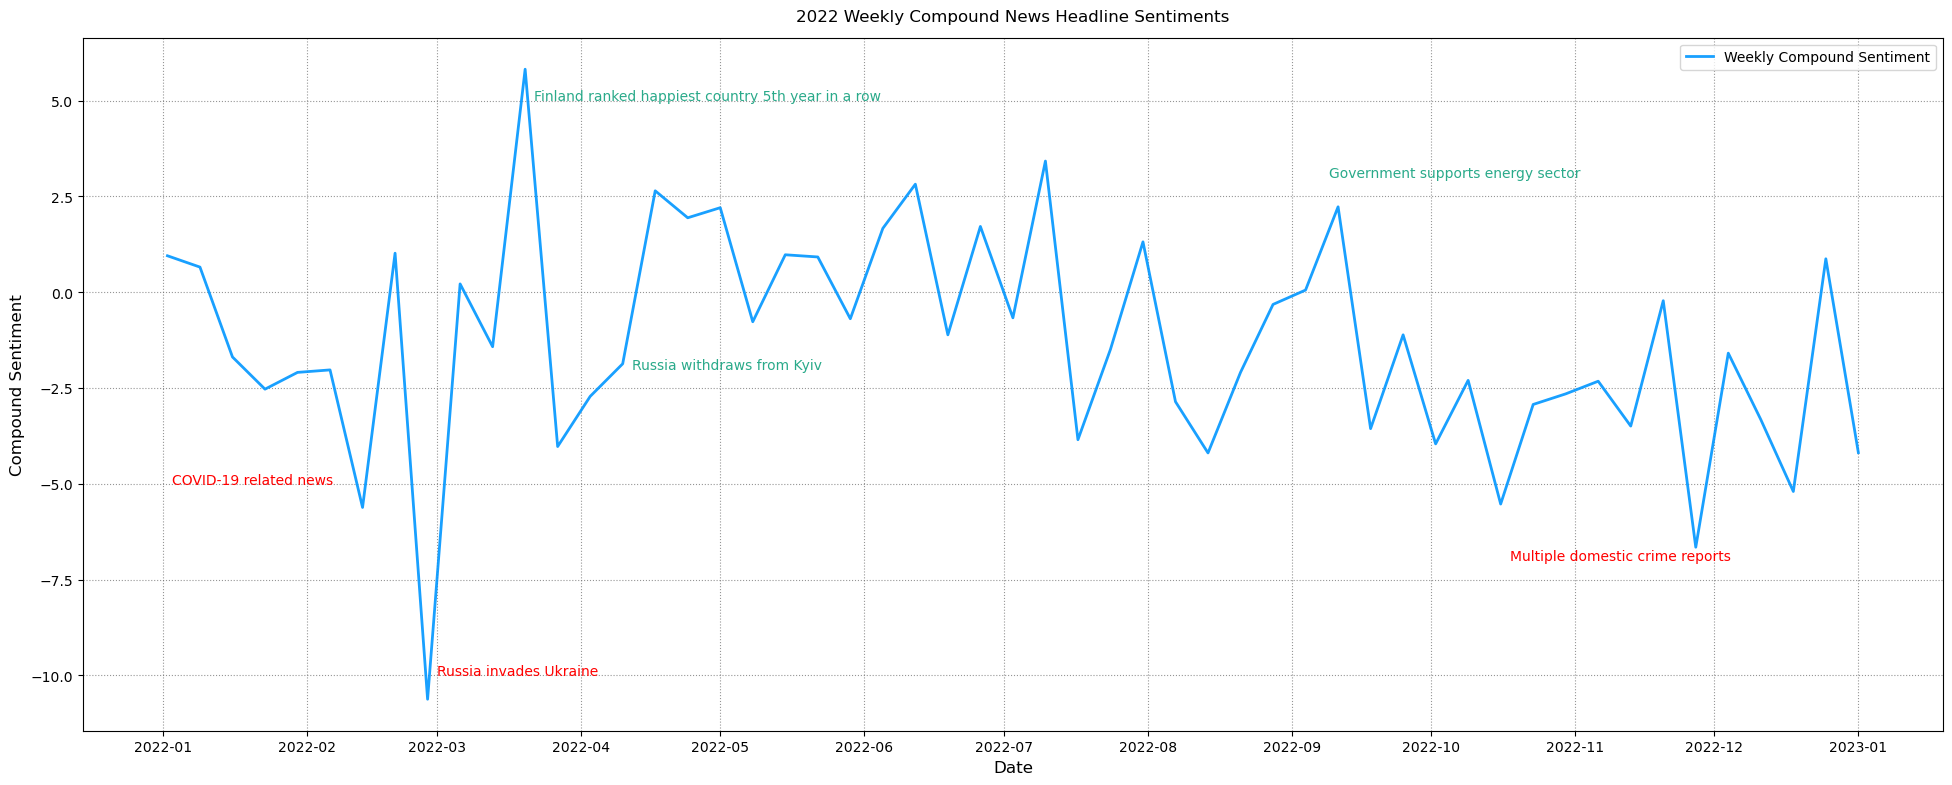

In [129]:
def plot_sentiments_with_events(weekly_df):
    fig, ax = plt.subplots(figsize=(24, 9), facecolor='w')

    covid_related = pd.to_datetime('2022-01-23 00:00:00')
    ukraine_war = pd.to_datetime('2022-02-24 00:00:00')
    finland_nato = pd.to_datetime('2022-05-17 00:00:00')
    russia_withdraws = pd.to_datetime('2022-04-06 00:00:00')
    energy_support = pd.to_datetime('2022-09-07 00:00:00')
    domestic_crimes = pd.to_datetime('2022-10-16 00:00:00')
    happy_finland = pd.to_datetime('2022-03-17 00:00:00')

    # Peaks and valleys
    ax.text( x=covid_related - timedelta(days=20), y=-5, s=f"COVID-19 related news", color='#FF0000', fontsize=10)
    ax.text( x=ukraine_war + timedelta(days=5), y=-10, s=f"Russia invades Ukraine", color='#FF0000', fontsize=10)
    ax.text( x=happy_finland + timedelta(days=5), y=5, s=f"Finland ranked happiest country 5th year in a row", color='#2AAA8A', fontsize=10)
    ax.text( x=russia_withdraws + timedelta(days=6), y=-2, s=f"Russia withdraws from Kyiv", color='#2AAA8A', fontsize=10)
    ax.text( x=energy_support + timedelta(days=2), y=3, s=f"Government supports energy sector", color='#2AAA8A', fontsize=10)
    ax.text( x=domestic_crimes + timedelta(days=2), y=-7, s=f"Multiple domestic crime reports", color='#FF0000', fontsize=10)

    ax.plot(weekly_df['date'], weekly_df['compound'], color='#0096FF', marker='', linestyle='-',linewidth=2, markersize=12, alpha=.9)

    # Setting Labels
    ax.set_title( "2022 Weekly Compound News Headline Sentiments", fontsize=12, pad=12)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Compound Sentiment", fontsize=12)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

    # Legend & Grid
    ax.legend(["Weekly Compound Sentiment"])
    ax.grid(linestyle=":", color='#696969', alpha=0.7)

    plt.show()

plot_sentiments_with_events(weekly_df)